In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv(r'C:\Users\aryan\OneDrive\Desktop\Capstone Project\Data Preprocessing\gurgaon_properties_cleaned_v2.csv')

In [57]:
pd.set_option('display.max_columns', None)

In [11]:
df.shape

(3554, 24)

In [12]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1679
built_up_area          1967
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

**build up area**

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

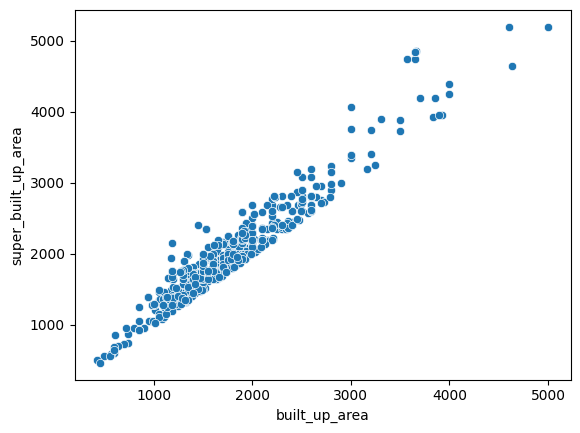

In [14]:
sns.scatterplot(x= df['built_up_area'], y= df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

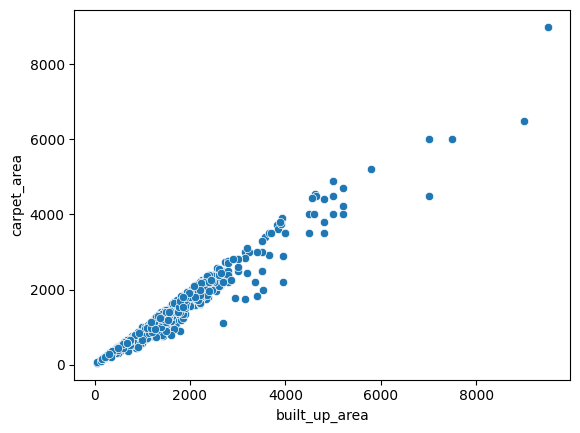

In [15]:
sns.scatterplot(x= df['built_up_area'], y= df['carpet_area'])

In [ ]:
df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio


In [26]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]
all_present_df.shape

(531, 24)

In [27]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [29]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [30]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [31]:
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [32]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2), inplace= True)

C:\Users\aryan\AppData\Local\Temp\ipykernel_14164\3089369129.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2), inplace= True)
C:\Users\aryan\AppData\Local\Temp\ipykernel_14164\3089369129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [33]:
df.update(sbc_df)

In [34]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1679
built_up_area          1546
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [35]:
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [37]:
sb_df['built_up_area'].fillna(sb_df['super_built_up_area']/1.105, inplace= True)

C:\Users\aryan\AppData\Local\Temp\ipykernel_14164\240973593.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(sb_df['super_built_up_area']/1.105, inplace= True)
C:\Users\aryan\AppData\Local\Temp\ipykernel_14164\240973593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(sb_df['sup

In [40]:
df.update(sb_df)

In [41]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1679
built_up_area           671
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [42]:
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [43]:
c_df['built_up_area'].fillna(c_df['carpet_area']/0.9, inplace= True)
df.update(c_df)

C:\Users\aryan\AppData\Local\Temp\ipykernel_14164\1141492528.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(c_df['carpet_area']/0.9, inplace= True)
C:\Users\aryan\AppData\Local\Temp\ipykernel_14164\1141492528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(c_df['carpet_area']/0

In [44]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1679
built_up_area             0
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

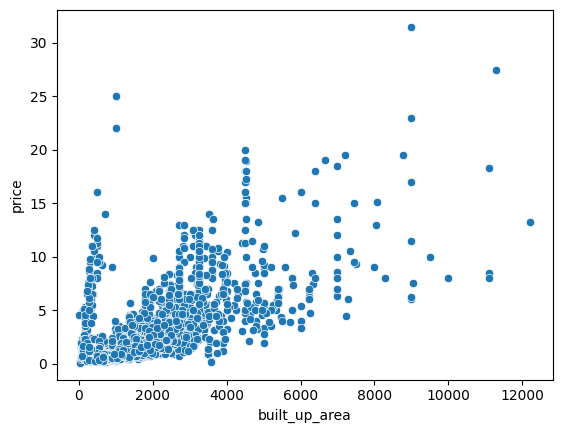

In [45]:
sns.scatterplot(x= df['built_up_area'], y= df['price'])

In [49]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price', 'area', 'built_up_area']]
anamoly_df

,price,area,built_up_area
9,4.50,1350.0,1350.000000
35,8.25,2160.0,300.000000
40,2.80,2047.0,1971.000000
41,5.50,1800.0,1800.000000
42,2.58,2200.0,1990.950226
...,...,...,...
3470,4.25,1620.0,1620.000000
3471,9.80,3240.0,300.000000
3506,3.90,1174.0,1388.543100
3521,3.60,1449.0,1449.000000


In [51]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [52]:
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

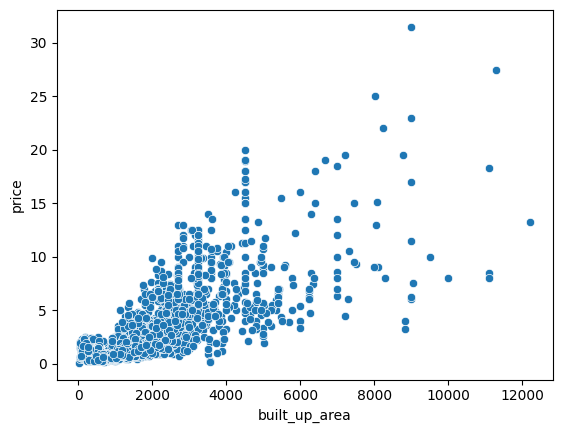

In [53]:
sns.scatterplot(x= df['built_up_area'], y= df['price'])

In [58]:
anamoly_df_1 = df[(df['built_up_area'] > 8000) & (df['price'] < 10)]
anamoly_df_1

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
309,house,anamika enclave,sector 12,6.00,14493.0,4140.0,Plot area 4140(384.62 sq.m.)Built Up area: 900...,9,9,3+,3.0,North-West,Old Property,NaN,9000.000000,NaN,0,0,0,0,0,0,9,460.000000
422,flat,the penthouses at the hibiscus,sector 50,8.50,8500.0,10000.0,Carpet area: 10000 (929.03 sq.m.),4,4,3,9.0,South-East,Moderately Old,NaN,11111.111111,10000.0,0,1,0,0,0,0,35,2500.000000
554,house,dlf city phase 1,sector 26,3.25,3681.0,8829.0,Plot area 109(91.14 sq.m.),3,3,3,2.0,West,Old Property,NaN,8829.000000,NaN,1,0,0,0,0,0,79,2943.000000
1291,house,independent,sector 13,9.00,11111.0,8100.0,Plot area 900(83.61 sq.m.),10,5,3+,4.0,NaN,Old Property,NaN,8100.000000,NaN,0,0,0,0,0,0,0,810.000000
1596,house,independent,sector 25,8.00,8000.0,10000.0,Carpet area: 10000 (929.03 sq.m.),3,9,2,3.0,NaN,New Property,NaN,11111.111111,10000.0,0,0,0,0,0,0,0,3333.333333
1785,house,dlf city plots,sector 26,4.00,4531.0,8829.0,Plot area 109(91.14 sq.m.),4,3,2,2.0,NaN,Relatively New,NaN,8829.000000,NaN,0,0,0,0,0,1,0,2207.250000
2296,house,independent,sector 56,8.00,9654.0,8287.0,Plot area 362(33.63 sq.m.)Built Up area: 8286 ...,10,10,3+,4.0,NaN,Relatively New,NaN,8286.000000,NaN,1,1,0,1,0,2,107,828.700000
2350,flat,the penthouses at the hibiscus,sector 50,8.00,8888.0,9001.0,Carpet area: 9000 (836.13 sq.m.),4,3,3,7.0,South-East,Moderately Old,NaN,10000.000000,9000.0,0,1,0,0,0,0,35,2250.250000
3064,flat,krrish provence estate,gwal pahari,7.50,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,23.0,North-East,Relatively New,10000.0,9049.773756,NaN,0,1,0,1,1,0,49,2000.000000
3409,house,independent,sohna road,6.25,6944.0,9001.0,Plot area 1000(836.13 sq.m.),3,3,0,1.0,NaN,Moderately Old,NaN,9000.000000,NaN,0,0,0,0,0,0,0,3000.333333


In [59]:
anamoly_df_1['built_up_area'] = anamoly_df_1['area']
df.update(anamoly_df_1)

C:\Users\aryan\AppData\Local\Temp\ipykernel_14164\1932687724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anamoly_df_1['built_up_area'] = anamoly_df_1['area']


<Axes: xlabel='built_up_area', ylabel='price'>

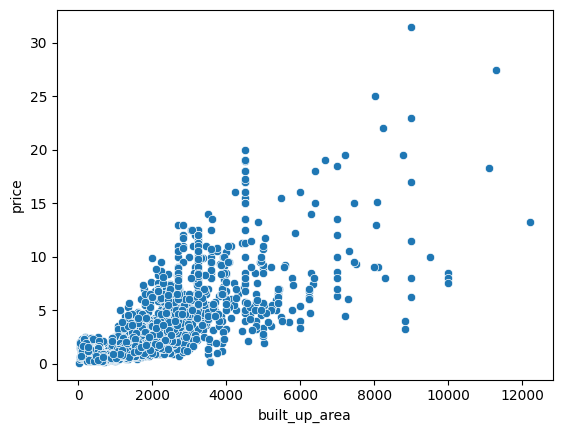

In [60]:
sns.scatterplot(x= df['built_up_area'], y= df['price'])

In [61]:
df.drop(columns= ['areaWithType', 'area', 'super_built_up_area', 'carpet_area', 'area_room_ratio'], inplace= True)

In [62]:
df.head(1)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3,2,2,2.0,NaN,New Property,850.0,0,0,0,0,0,0,8


In [63]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

**floorNum**

In [65]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
500,house,independent,sector 4,0.65,11111.0,4,2,2,NaN,NaN,Moderately Old,585.0,0,0,0,0,0,0,0
767,house,independent,sector 7,6.50,15046.0,3,2,3+,NaN,NaN,Old Property,4320.0,0,0,0,0,0,0,9
1294,house,independent,sector 3,1.50,10288.0,3,3,0,NaN,NaN,Old Property,210.0,0,0,0,0,0,0,0
1452,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,1,NaN,NaN,Relatively New,3240.0,0,0,0,0,0,0,21
1465,house,ansal sushant lok plots,sector 43,3.30,26570.0,1,1,0,NaN,NaN,Under Construction,1242.0,0,0,0,0,0,0,0
1946,house,jacob pura,sector 12,0.35,9722.0,2,1,0,NaN,NaN,Old Property,360.0,0,0,0,0,0,0,0
2047,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,2,NaN,East,Moderately Old,3240.0,0,1,1,1,0,0,88
2156,house,independent,sector 4,4.12,8889.0,2,1,3+,NaN,NaN,Moderately Old,4635.0,0,0,0,0,0,0,0
2270,house,emaar mgf marbella,sector 66,9.00,21251.0,4,4,3+,NaN,South-West,Relatively New,5200.0,0,1,1,1,0,1,114
2438,house,dlf new town heights,sector 86,2.47,7719.0,4,4,3+,NaN,West,Moderately Old,2800.0,0,1,0,1,0,1,130


In [66]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score'],
      dtype='object')

In [131]:
df[df['property_type'] == 'house']['floorNum'].median()

np.float64(2.0)

In [132]:
df['floorNum'].fillna(2, inplace= True)

C:\Users\aryan\AppData\Local\Temp\ipykernel_14164\1159636681.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2, inplace= True)


In [133]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [134]:
df.drop(columns= 'facing', inplace= True)

In [137]:
df.drop(index= 2535, inplace= True)

In [138]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [139]:
df['agePossession'].value_counts()

agePossession
Relatively New        1605
New Property           557
Moderately Old         545
Old Property           293
Undefined              291
Under Construction     262
Name: count, dtype: int64

In [140]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
10,house,independent,sector 109,1.55,6568.0,3,2,0,1.0,Undefined,2360.000000,0,0,0,0,0,0,0
33,house,greenopolis,sector 89,0.70,5397.0,2,2,2,14.0,Undefined,1297.000000,0,0,0,0,0,0,0
48,flat,smart world gems,sector 89,1.71,12000.0,3,2,0,3.0,Undefined,1423.000000,0,0,0,0,0,0,45
70,flat,rof aalayas,sector 102,0.45,6000.0,1,1,2,6.0,Undefined,750.000000,0,0,0,0,0,0,0
74,house,bhim garh kheri,sector 3,1.50,7576.0,7,2,0,1.0,Undefined,1980.000000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496,flat,raheja vedaanta,sector 108,0.70,4522.0,2,2,3,1.0,Undefined,1548.000000,0,0,0,0,0,0,0
3501,flat,signature global city,sector 37d,1.10,9839.0,2,2,2,4.0,Undefined,1242.222222,0,0,0,0,0,0,59
3507,house,independent,sector 21,0.45,8411.0,3,2,1,1.0,Undefined,594.444444,0,0,0,0,0,0,0
3519,flat,sidhartha ncr one,sector 95,0.57,4179.0,2,2,2,10.0,Undefined,1364.000000,0,0,0,0,0,0,0


In [141]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [144]:
df['agePossession'] = df.apply(mode_based_imputation, axis= 1)

In [145]:
df['agePossession'].value_counts()

agePossession
Relatively New        1715
New Property           598
Moderately Old         585
Old Property           324
Under Construction     276
Undefined               55
Name: count, dtype: int64

In [146]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [147]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [148]:
df['agePossession'] = df.apply(mode_based_imputation2, axis= 1)
df['agePossession'] = df.apply(mode_based_imputation3, axis= 1)

In [149]:
df['agePossession'].value_counts()

agePossession
Relatively New        1732
Moderately Old         619
New Property           599
Old Property           327
Under Construction     276
Name: count, dtype: int64

In [150]:
df.shape

(3553, 18)

In [151]:
df.to_csv(r'C:\Users\aryan\OneDrive\Desktop\Capstone Project\Data Preprocessing\gurgaon_properties_missing_value_imputation.csv',index=False)